### State Populations

Data Source: https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
states_df = pd.read_csv('state_pops.csv')

In [26]:
# create numbers for interpolation
for i in [2010,2018]:
    states_df['{}'.format(i)] = states_df['{}'.format(i)].str.replace(r"[^\d]",'')
    states_df['{}'.format(i)] = pd.to_numeric(states_df['{}'.format(i)])

In [ ]:
# calculate annual change then interpolate
states_df['annual_change'] = (states_df['2018'] - states_df['2010']) / (2018-2010)
for i in range(2011,2018):
    states_df['{}'.format(i)] = states_df['{}'.format(i-1)] + states_df['annual_change']

In [60]:
# build stacked_df

df = pd.DataFrame()

for i in range(2011,2019):
    df2 = states_df[['State','Abbreviation','{}'.format(i)]]
    df2['year'] = i
    df2.columns = ['state','abbreviation','pop','year']
    df = pd.concat([df,df2],axis=0)

/Users/Mark/anaconda3/envs/nyc_housing/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


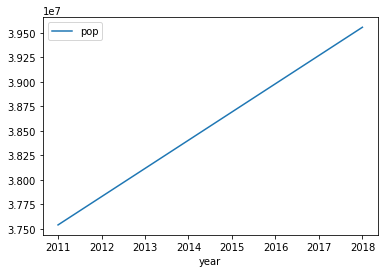

In [65]:
df[df.state=='California'].plot('year','pop')

In [66]:
df.to_csv('state_pop_annual.csv')